<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [7]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler

### 1. Import the data

In [8]:
csv_file = 'ais.csv'

In [9]:
df=pd.read_csv(r'C:\\Users\\samhe\\OneDrive\\Documents\\IOD\\DATA\\ais.csv')
df

Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0             1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1             2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2             3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3             4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4             5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   
..          ...   ...  ...   ...   ...   ...    ...    ...     ...    ...   
197         198  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00   
198         199  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00   
199         200  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00   
200         201  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00   
201         202  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00   

        ht    wt sex   sport  
0    195.9  78.9   f  B_Ball  
1    189.7  74.4   f  B_Ball  
2    177.8  69.1   f  B_Ball  
3    185.0  74.9   f  B_Ball  
4    184.6  64.6   f  B_Ball  
..     ...   ...  ..     ...  
197  183.9  93.2   m  W_Polo  
198  183.5  80.0   m  Tennis  
199  183.1  73.8   m  Tennis  
200  178.4  71.1   m  Tennis  
201  190.8  76.7   m  Tennis  

[202 rows x 14 columns]

### 2. Do some EDA of relationships between features.

In [10]:
df.columns = df.columns.str.lower()
df

unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcbfat    lbm  \
0             1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1             2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2             3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3             4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4             5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   
..          ...   ...  ...   ...   ...   ...    ...    ...     ...    ...   
197         198  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00   
198         199  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00   
199         200  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00   
200         201  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00   
201         202  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00   

        ht    wt sex   sport  
0    195.9  78.9   f  B_Ball  
1    189.7  74.4   f  B_Ball  
2    177.8  69.1   f  B_Ball  
3    185.0  74.9   f  B_Ball  
4    184.6  64.6   f  B_Ball  
..     ...   ...  ..     ...  
197  183.9  93.2   m  W_Polo  
198  183.5  80.0   m  Tennis  
199  183.1  73.8   m  Tennis  
200  178.4  71.1   m  Tennis  
201  190.8  76.7   m  Tennis  

[202 rows x 14 columns]

In [6]:
df.shape

(202, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [8]:
df.sex.unique()

array(['f', 'm'], dtype=object)

In [10]:
df.sport.unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

In [11]:
df.sport.value_counts()

sport
Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: count, dtype: int64

In [20]:
group_by_sport = df.groupby(['sport','sex']).size().reset_index(name= 'count')
print(group_by_sport)

      sport sex  count
0    B_Ball   f     13
1    B_Ball   m     12
2     Field   f      7
3     Field   m     12
4       Gym   f      4
5   Netball   f     23
6       Row   f     22
7       Row   m     15
8      Swim   f      9
9      Swim   m     13
10   T_400m   f     11
11   T_400m   m     18
12  T_Sprnt   f      4
13  T_Sprnt   m     11
14   Tennis   f      7
15   Tennis   m      4
16   W_Polo   m     17


In [21]:
df.head(1)

unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcbfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball

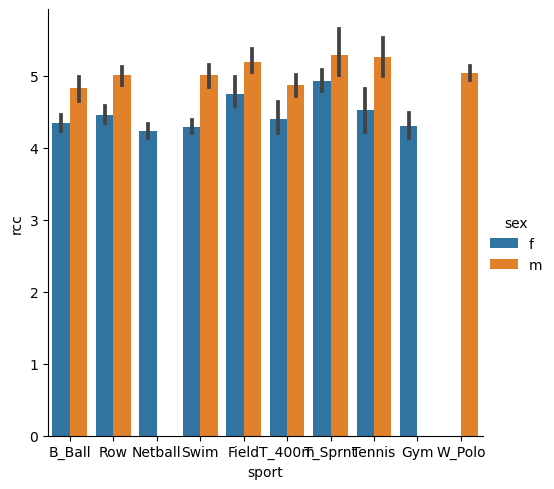

In [22]:
sns.catplot(x = 'sport', y= 'rcc', hue= 'sex', kind = 'bar',estimator= 'mean',data= df)
plt.show()

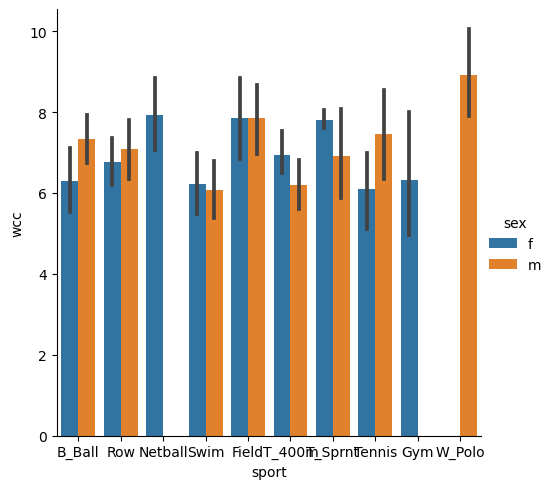

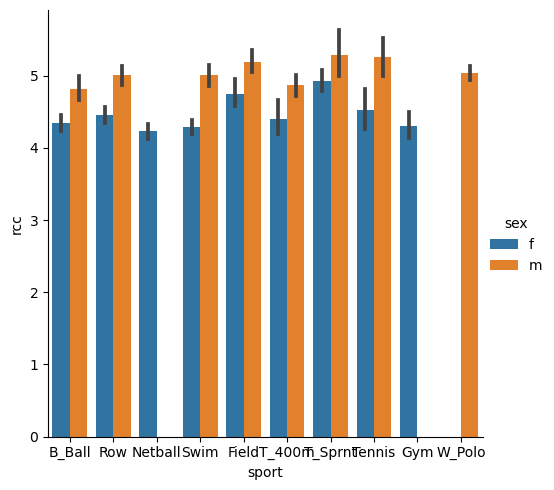

In [30]:
sns.catplot(x = 'sport', y= 'wcc', hue= 'sex', kind = 'bar',estimator= 'mean',data= df)
sns.catplot(x = 'sport', y= 'rcc', hue= 'sex', kind = 'bar',estimator= 'mean',data= df)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
plt.show()

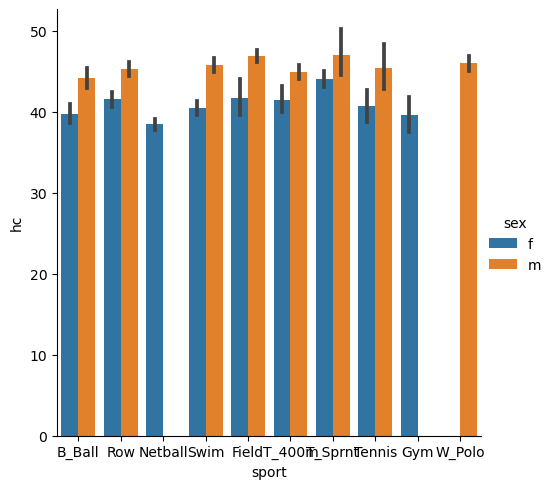

In [31]:
sns.catplot(x = 'sport', y= 'hc', hue= 'sex', kind = 'bar',estimator= 'mean',data= df)

In [32]:
df.head(1)

unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcbfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball

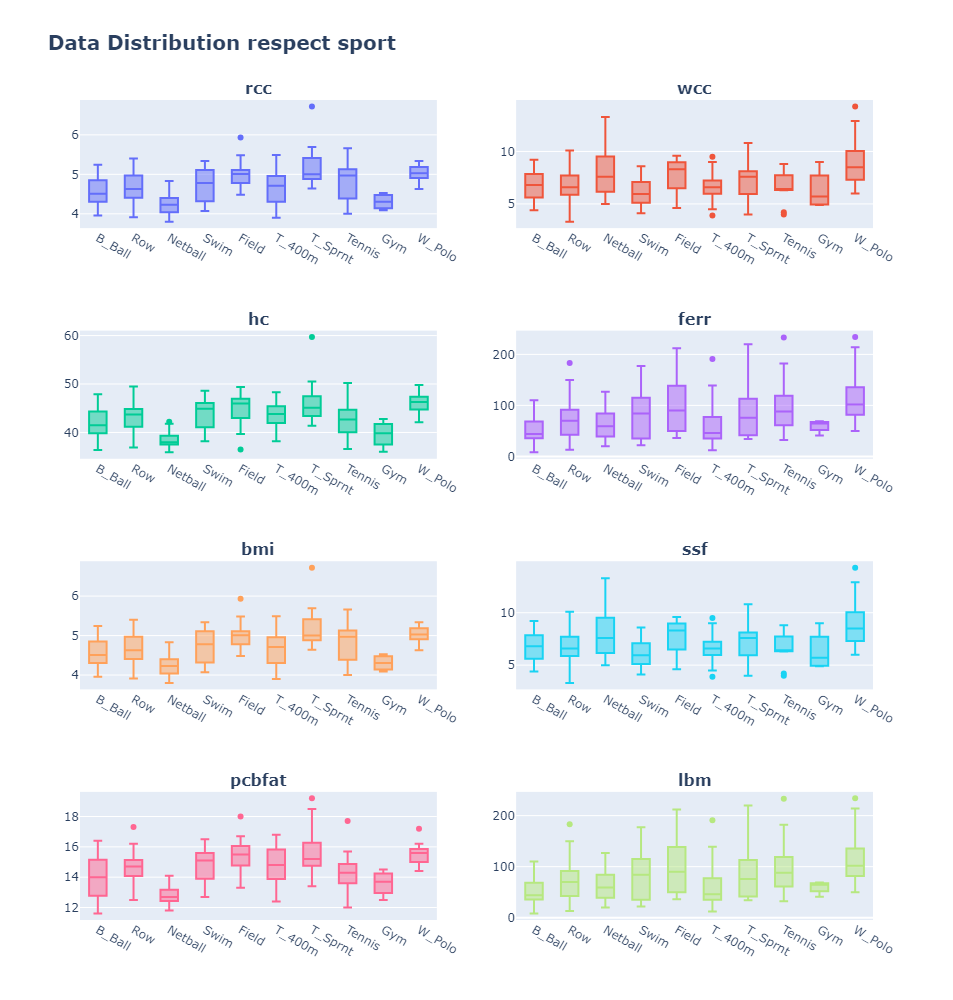

In [51]:
fig = make_subplots(rows=4, cols=2, subplot_titles=('<b>rcc','<b>wcc','<b>hc', '<b>ferr','<b>bmi','<b>ssf', '<b>pcbfat','<b>lbm'))

fig.add_trace(go.Box(x=df['sport'], y=df['rcc']), row=1, col=1)
fig.add_trace(go.Box(x=df['sport'], y=df['wcc']), row=1, col=2)
fig.add_trace(go.Box(x=df['sport'], y=df['hc']), row=2, col=1)
fig.add_trace(go.Box(x=df['sport'], y=df['ferr']), row=2, col=2)
fig.add_trace(go.Box(x=df['sport'], y=df['rcc']), row=3, col=1)
fig.add_trace(go.Box(x=df['sport'], y=df['wcc']), row=3, col=2)
fig.add_trace(go.Box(x=df['sport'], y=df['hg']), row=4, col=1)
fig.add_trace(go.Box(x=df['sport'], y=df['ferr']), row=4, col=2)

fig.update_layout(title='<b>Data Distribution respect sport', height=1000, width=1000,
                 showlegend=False,
                 title_font_size = 20)
fig.show()

In [48]:
df.hc.unique()

array([37.5, 38.2, 36.4, 37.3, 41.5, 37.4, 39.6, 39.9, 41.1, 41.6, 41.4,
       43.8, 41. , 43.7, 40.3, 37.6, 41.8, 44. , 39.2, 36.9, 44.8, 41.2,
       39.8, 38.4, 42.8, 42.7, 42.6, 44.1, 42.2, 38. , 37.7, 38.7, 36.6,
       36.5, 36.3, 35.9, 38.3, 38.8, 39.5, 39.7, 40.4, 38.9, 42. , 40.9,
       47.1, 42.1, 40.6, 47. , 42.9, 39.1, 43.5, 40.1, 43.2, 43.3, 45.3,
       44.7, 40.8, 37.8, 44.3, 39. , 40.7, 36. , 46.8, 45.2, 46.6, 44.9,
       46.1, 45.1, 47.5, 45.5, 48.6, 47.8, 42.5, 45.4, 43. , 44.5, 49.5,
       46.2, 46.5, 44.4, 47.9, 46.3, 43.6, 48.2, 45.7, 45.8, 44.2, 45.6,
       49.4, 49.1, 46. , 59.7, 48.3, 47.7, 49.7, 48.1, 50.5, 45. , 47.6,
       48. , 47.3, 45.9, 49.8, 46.9, 50.2])

In [43]:
df[df['rcc']>=6]

unnamed: 0   rcc  wcc    hc    hg  ferr    bmi   ssf  pcbfat   lbm  \
165         166  6.72  7.1  59.7  19.2    76  24.81  44.8    9.56  69.0   

        ht    wt sex    sport  
165  174.9  75.9   m  T_Sprnt

In [23]:
df.rcc.unique()

array([3.96, 4.41, 4.14, 4.11, 4.45, 4.1 , 4.31, 4.42, 4.3 , 4.51, 4.71,
       4.62, 4.35, 4.26, 4.63, 4.36, 3.91, 4.37, 4.9 , 4.46, 3.95, 5.02,
       4.16, 4.49, 4.21, 4.57, 4.87, 4.44, 4.56, 4.15, 4.32, 4.06, 4.12,
       4.17, 3.8 , 4.27, 3.9 , 4.02, 4.39, 4.52, 4.25, 4.4 , 4.83, 4.23,
       4.24, 4.03, 4.07, 4.38, 4.13, 4.48, 5.31, 4.58, 4.81, 4.77, 5.33,
       4.75, 4.76, 4.2 , 4.09, 4.82, 5.16, 4.97, 4.  , 4.08, 4.98, 4.66,
       4.19, 4.53, 5.13, 5.09, 5.17, 5.11, 5.03, 5.32, 5.34, 5.04, 4.95,
       4.78, 5.21, 5.22, 5.18, 5.4 , 4.92, 5.24, 4.54, 5.  , 4.89, 4.5 ,
       4.84, 4.73, 4.55, 4.93, 4.94, 4.86, 4.91, 5.1 , 4.88, 5.48, 5.93,
       5.01, 4.64, 6.72, 4.68, 4.99, 5.49, 5.59, 5.5 , 4.96, 5.69, 5.29,
       5.25, 5.08, 5.66, 5.38])

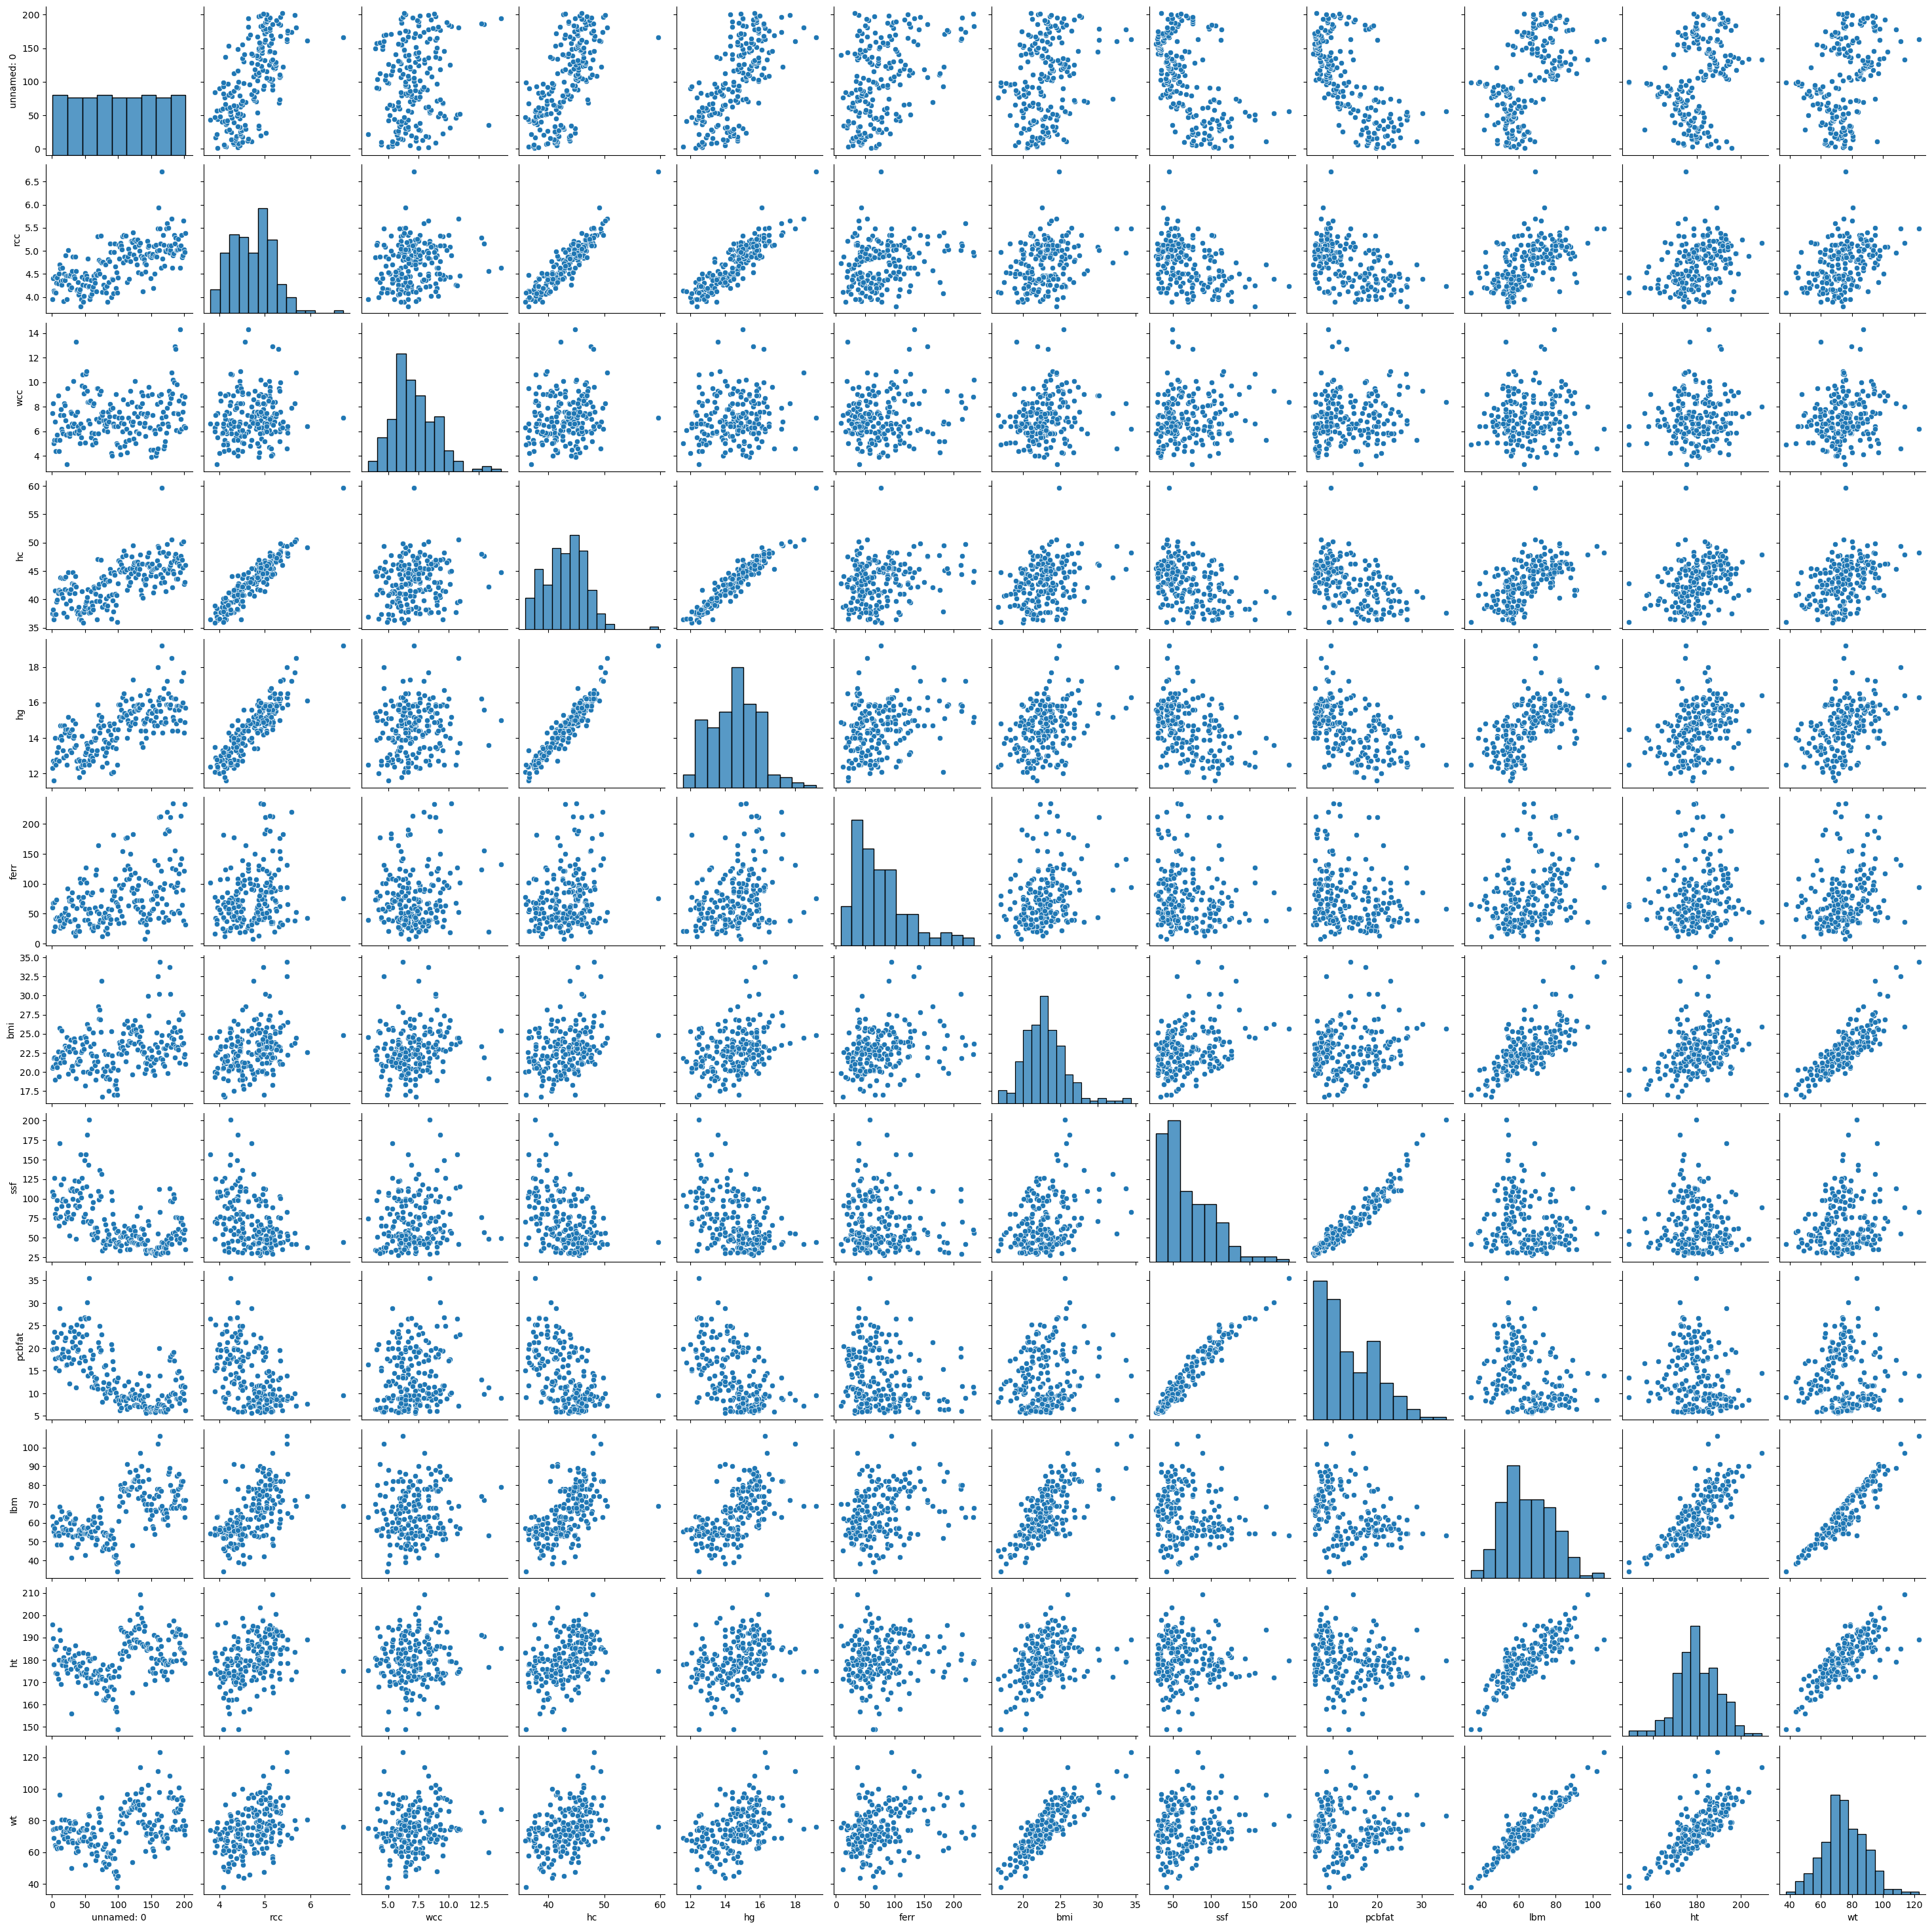

In [55]:
sns.pairplot(df)

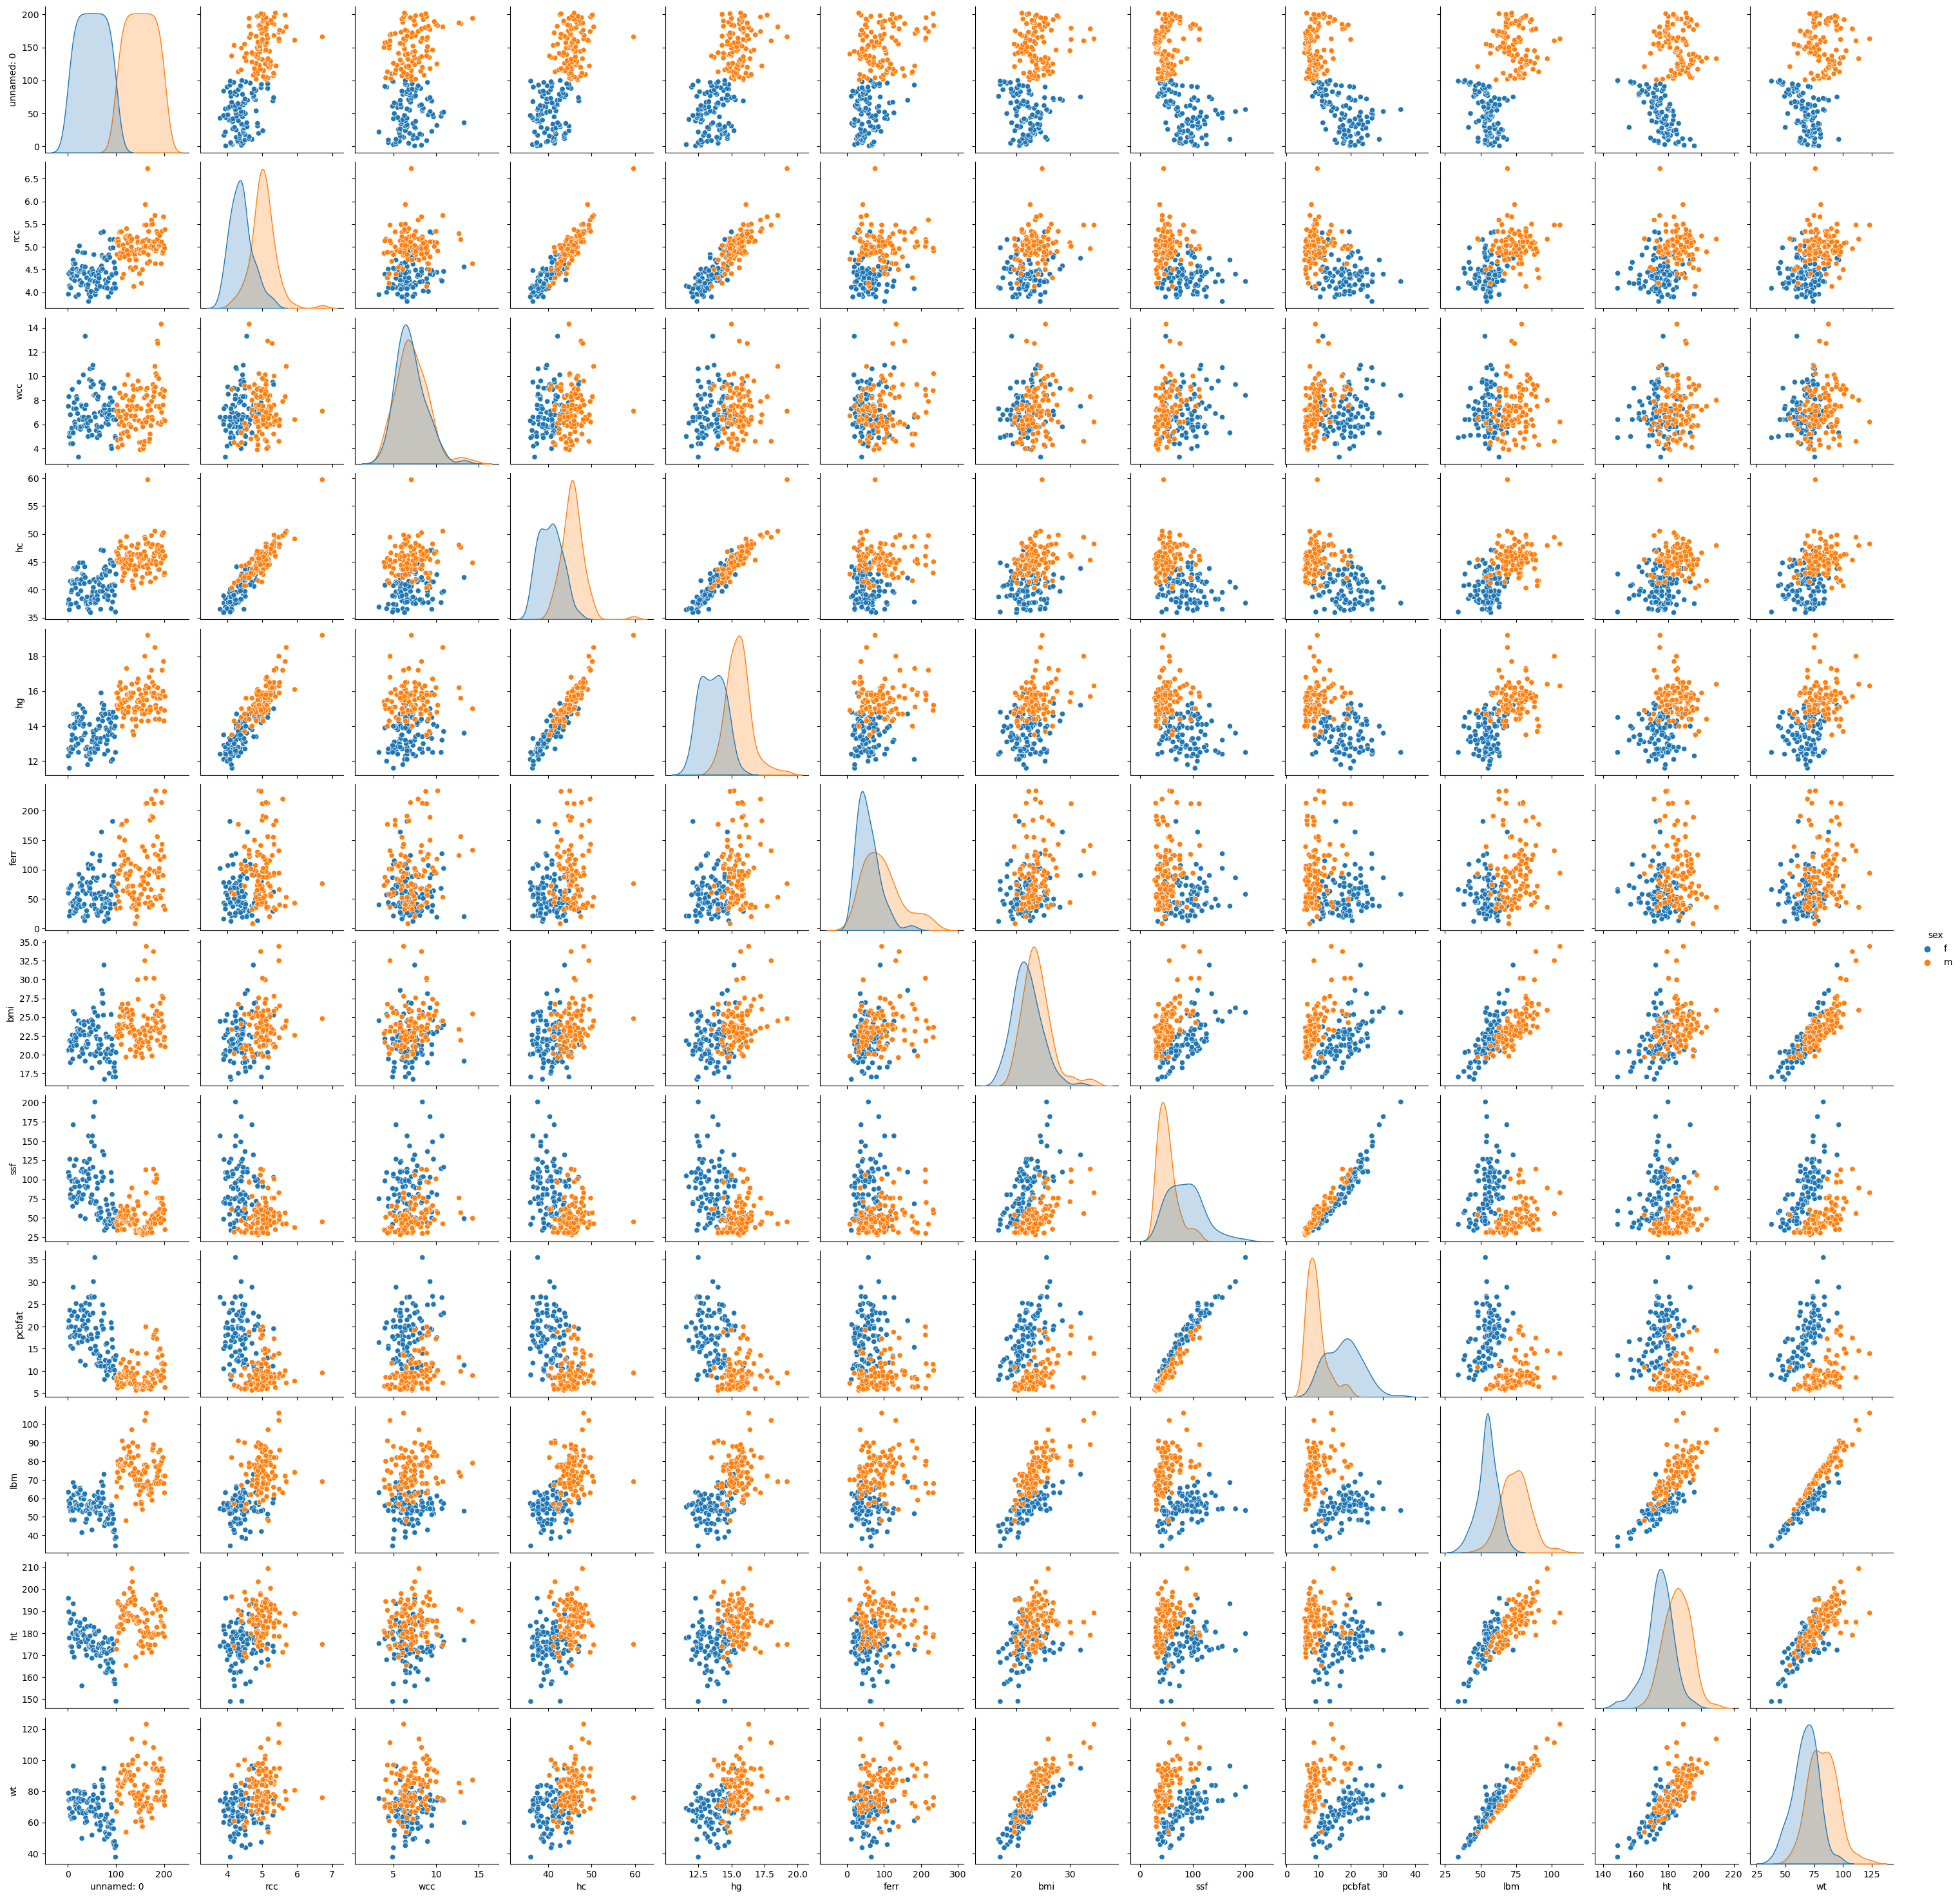

In [58]:
sns.pairplot(df,hue='sex')
plt.show()

In [7]:
df.dtypes

unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcbfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [11]:
# ANSWER
X=df.drop(['sex','sport'], axis=1)
X= df[['pcbfat','wt']]

In [12]:
standardscaler=StandardScaler()
xss=standardscaler.fit_transform(X)
xss

array([[ 1.01102742e+00,  2.80193400e-01],
       [ 1.26206048e+00, -4.37646267e-02],
       [ 1.03208181e+00, -4.25315191e-01],
       [ 1.64427855e+00, -7.76929040e-03],
       [ 6.69298548e-01, -7.49273217e-01],
       [ 3.35667517e-01, -8.14064823e-01],
       [ 1.04989705e+00,  1.38279114e-02],
       [ 1.44507167e+00, -9.14851764e-01],
       [ 7.19505160e-01, -6.12490940e-01],
       [ 2.53069544e-01, -8.71657361e-01],
       [ 2.48159526e+00,  1.53283110e+00],
       [ 7.40559545e-01,  3.54251131e-02],
       [ 1.58597410e+00, -8.64458293e-01],
       [ 6.80635525e-01,  3.95378476e-01],
       [ 8.52309745e-01, -2.66935711e-01],
       [ 1.02398396e+00, -3.24528249e-01],
       [ 1.88721377e+00, -1.30153434e-01],
       [ 7.34081273e-01, -4.54111460e-01],
       [ 1.34141931e+00,  3.95378476e-01],
       [ 1.41591945e+00, -1.51750635e-01],
       [ 4.44178581e-01, -3.65655594e-02],
       [ 4.65232966e-01,  2.82260459e-02],
       [ 9.46244695e-01, -3.96518922e-01],
       [ 9.

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [13]:
# ANSWER
from sklearn.cluster import KMeans

K=2
k_mean = KMeans(n_clusters=K)
k_mean.fit(xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models

In [14]:
# ANSWER
labels=k_mean.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# inertia shows the distsnece between the data to centroid
k_mean.inertia_

242.7381160818211

In [15]:
X['labels']=labels
X

pcbfat    wt  labels
0     19.75  78.9       1
1     21.30  74.4       1
2     19.88  69.1       1
3     23.66  74.9       1
4     17.64  64.6       1
..      ...   ...     ...
197   11.79  93.2       0
198   10.05  80.0       0
199    8.51  73.8       0
200   11.50  71.1       0
201    6.26  76.7       0

[202 rows x 3 columns]

In [16]:
X['sex']=df['sex']
X

pcbfat    wt  labels sex
0     19.75  78.9       1   f
1     21.30  74.4       1   f
2     19.88  69.1       1   f
3     23.66  74.9       1   f
4     17.64  64.6       1   f
..      ...   ...     ...  ..
197   11.79  93.2       0   m
198   10.05  80.0       0   m
199    8.51  73.8       0   m
200   11.50  71.1       0   m
201    6.26  76.7       0   m

[202 rows x 4 columns]

In [17]:
X[(X['labels']==1)&(X['sex']=='m')]

pcbfat    wt  labels sex
120   10.81  53.8       1   m

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [18]:
# ANSWER
sum_square_distances = []
K= range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xss)
    sum_square_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

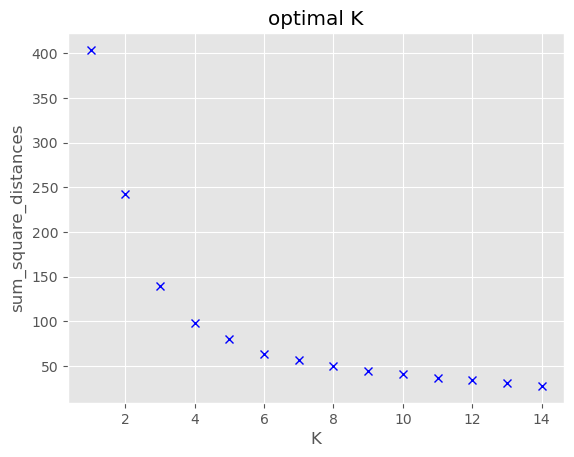

In [19]:
# ANSWER
plt.plot(K,sum_square_distances, 'bx')
plt.xlabel('K')
plt.ylabel('sum_square_distances')
plt.title('optimal K')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

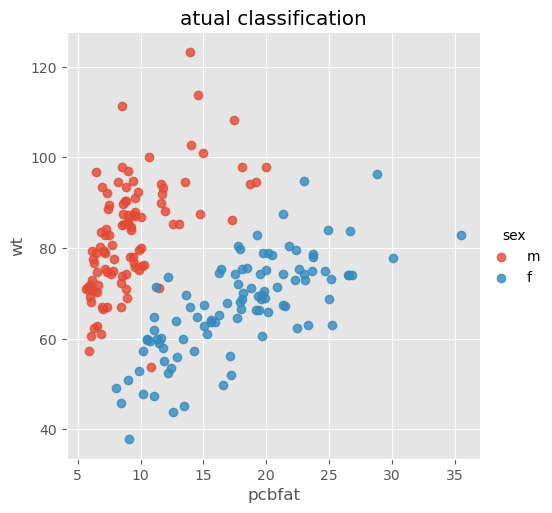

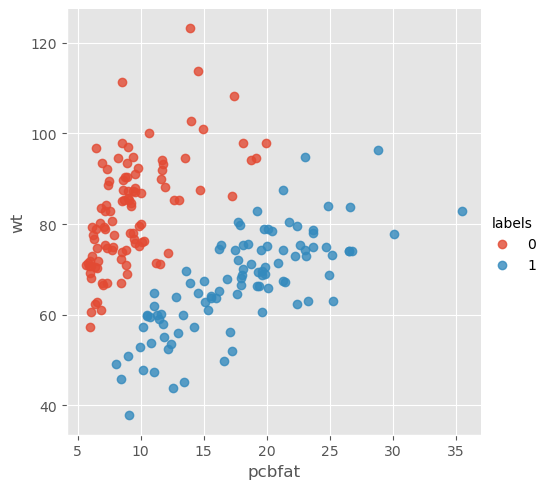

In [28]:
# ANSWER
sns.lmplot(x='pcbfat',y='wt', data=df, hue='sex',
           hue_order= [ 'm','f'],fit_reg=False)
plt.title('atual classification')
sns.lmplot(x='pcbfat',y='wt', data=X, hue='labels',fit_reg=False)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



